# Peer Reviewed week 3


In [1]:
# You may need this setup
using Plots
using GLM, RDatasets
#import Pkg; Pkg.add("GLM")
#import Pkg; Pkg.add("RDatasets")

gr() # Activate the GR backend for use with Plots

Plots.GRBackend()

Import the supplied data representing 15 pairs to x- and y-values. 

In [10]:
data_tofit = [1.6800483    -1.641695388; 
              0.501309281  -0.977697538; 
              1.528012113   0.52771122;
              1.70012253    1.711524991; 
              1.992493625   1.891000015;
              2.706075824  -0.463427794;
              2.994931927  -0.443566619;
              3.491852811  -1.275179133;
              3.501191722  -0.690499597;
              4.459924502  -5.516130799;
              4.936965851  -6.001703074;
              5.023289852  -8.36416901;
              5.04233698   -7.924477517;
              5.50739285  -10.77482371;
              5.568665171 -10.9171878]

for i in [1:15]
    
            println("observación $i");
    
            println(data_tofit[i,:]);
    end

# Create the arrays x and y, assigning x the first column of data_tofit and y the second column
x , y = data_tofit[:,1], data_tofit[:,2]



observación 1:15
[1.6800483 -1.641695388; 0.501309281 -0.977697538; 1.528012113 0.52771122; 1.70012253 1.711524991; 1.992493625 1.891000015; 2.706075824 -0.463427794; 2.994931927 -0.443566619; 3.491852811 -1.275179133; 3.501191722 -0.690499597; 4.459924502 -5.516130799; 4.936965851 -6.001703074; 5.023289852 -8.36416901; 5.04233698 -7.924477517; 5.50739285 -10.77482371; 5.568665171 -10.9171878]


([1.6800483, 0.501309281, 1.528012113, 1.70012253, 1.992493625, 2.706075824, 2.994931927, 3.491852811, 3.501191722, 4.459924502, 4.936965851, 5.023289852, 5.04233698, 5.50739285, 5.568665171], [-1.641695388, -0.977697538, 0.52771122, 1.711524991, 1.891000015, -0.463427794, -0.443566619, -1.275179133, -0.690499597, -5.516130799, -6.001703074, -8.36416901, -7.924477517, -10.77482371, -10.9171878])

Then we do a scatterplot, this gives us the points the line must go through.

In [3]:
# Plot the x and y data points using a scatter plot of the x and y array variables


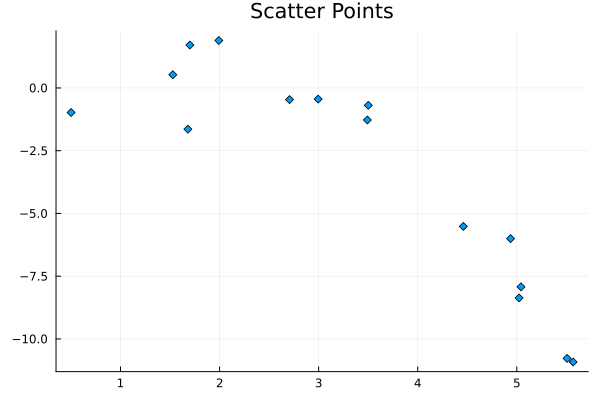

In [4]:
plot(x,y, linetype = :scatter, marker = :diamond , title       = "Scatter Points", legend=:false)

For the line, we need a function, which we now define. Note that the parameters a, b, c need not be passed to the function: we will keep resetting them to try to improve the fit.

In [5]:
# Create a function called parabfit, with x as the argument, returning a*x^2 + b*x + c


parabfit(x) = a*x^2 + b*x + c

parabfit (generic function with 1 method)

Let's check that we do get a reasonable parabola. Choose your own interval [xmin, xmax] and parameters a, b, c. If it looks too much like a straight line, chance your choices until it does.

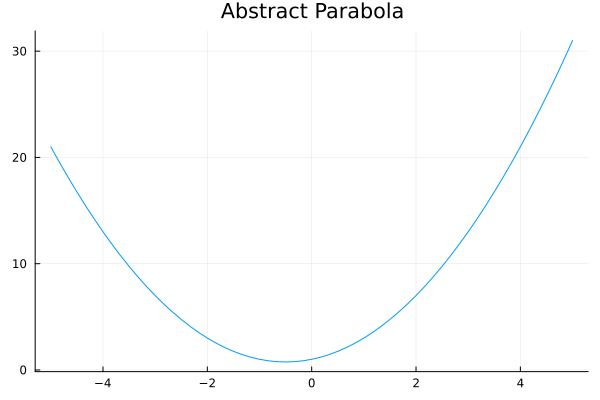

In [8]:
# Create variables a, b and c, assigning each the value 1
a = 1
b = 1
c = 1

# Plot the function parabfit, for x values between -5 and 5 
#plot(parabfit, -5, 5) 

plot(parabfit,−5,5, title       = "Abstract Parabola", legend=:false)

Now we choose a, b, c and plot the curve together with the points. 

Note that by looking at where the data points lie, we can deduce some of the properties for a, b, c, as follows.

The plot must have a y-intersection that is close to 0, so c is close to 0. Also, the parabola is open downwards, so a must be negative. Finally, it has its maximum at a positive x, so b must be positive. 

Use plot() to start with the scatter plot and plot!() to add the curve for parabfit. (There are other ways to do this ...)

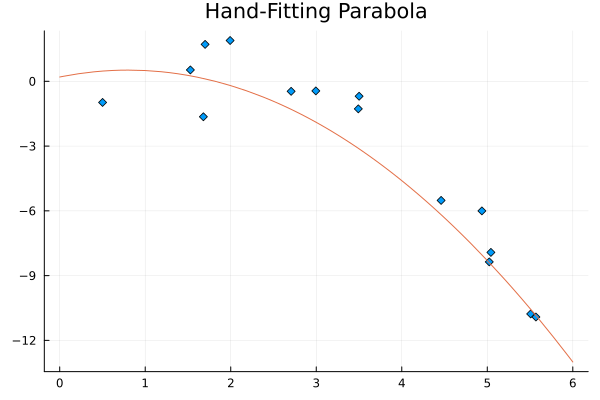

In [15]:
# More plot!() tries.
a,b,c = (-0.5) , 0.8 , 0.2
plot(x,y, linetype = :scatter, marker = :diamond, title       = "Hand-Fitting Parabola", legend=:false)
plot!(parabfit,0,6)

The calibration of the parabola was fast, following the instructions provided. A initial value of a=10 produced a parabola too narrow to be a good fit. The value of b was reached after iterative optimization, attempting many attempts.

In [ ]:
Lets attempt to stimate the values of a,b,c as accuratly as possible.

In [12]:
#Creamos una pequeña funcion de regresion lineal, ocupando vectores
function Reg(X, Y)
Xvar = [ ones(length(X))  X  X.^2 ];
c, b, a = (Xvar'*Xvar) \ (Xvar' * Y);
end

Reg(x,y)

3-element Vector{Float64}:
 -2.74783613091087
  3.510725129758952
 -0.8954949323743983

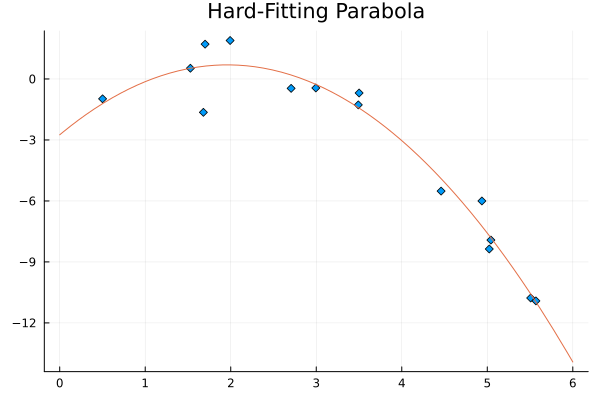

In [16]:
#No necesitamos manejar los datos a mano para saber su valor
c,b,a = Reg(x,y)
plot(x,y, linetype = :scatter, marker = :diamond, title       = "Hard-Fitting Parabola", legend=:false)
plot!(parabfit,0,6)